In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Q1
insurance=pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# Q2
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Q2
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
# Q2
insurance.shape

(1338, 7)

In [11]:
# Q2 
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
insurance["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='count'>

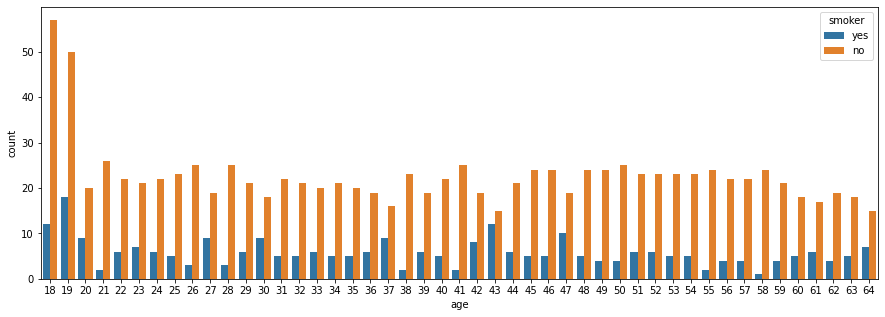

In [13]:
# Q3. numbers of young people smokering is higher compared to old people
plt.figure(figsize=(15,5))
sns.countplot(data=insurance, x="age", hue="smoker")


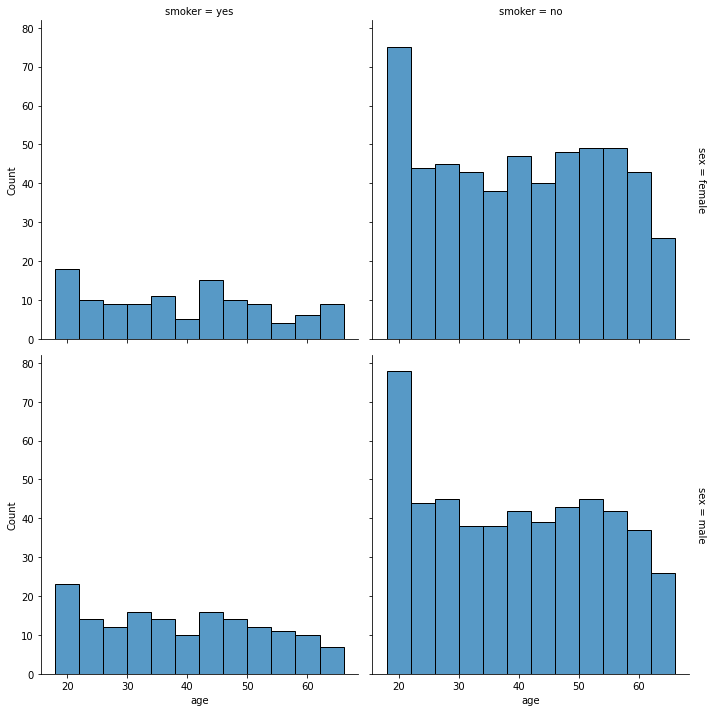

In [14]:
#3 there are more young males smokers than male
sns.displot(
    insurance, x="age", col="smoker", row="sex",
    binwidth=4, height=5, facet_kws=dict(margin_titles=True),
)

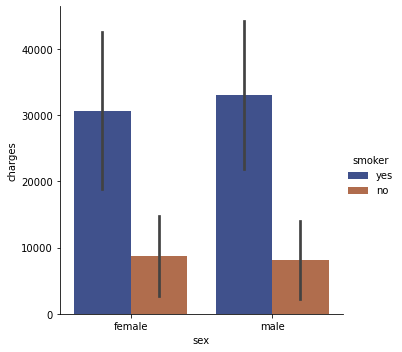

In [15]:
# Q3 insurance charges tends to be high on smoker compared to non smokers
sns.catplot(
    data=insurance, kind="bar",
    x="sex", y="charges", hue="smoker",
    ci="sd", palette="dark", alpha=.8, height=5
)

<AxesSubplot:>

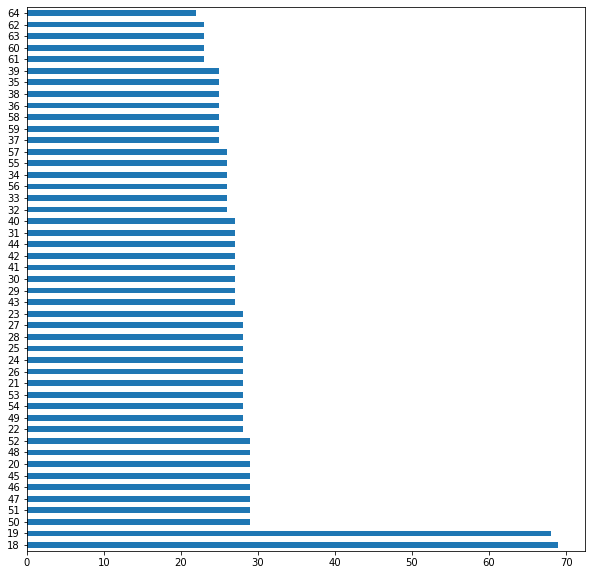

In [16]:
# Q3.young people take insurance cover compared to old 
plt.figure(figsize=(10,10))
insurance["age"].value_counts().plot(kind="barh")

In [17]:
# Q4
numerical_continuous=[]
for column in insurance.columns:
    if insurance[column].dtypes !='object':
        if insurance[column].nunique()>=10:
            numerical_continuous.append(column)
numerical_continuous.remove('charges')
numerical_continuous

['age', 'bmi']

In [18]:
# 4
numerical_discrete=[]
for column in insurance.columns:
    if insurance[column].dtypes !='object':
        if insurance[column].nunique()<=10:
            numerical_discrete.append(column)
numerical_discrete

['children']

In [19]:
insurance["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<AxesSubplot:>

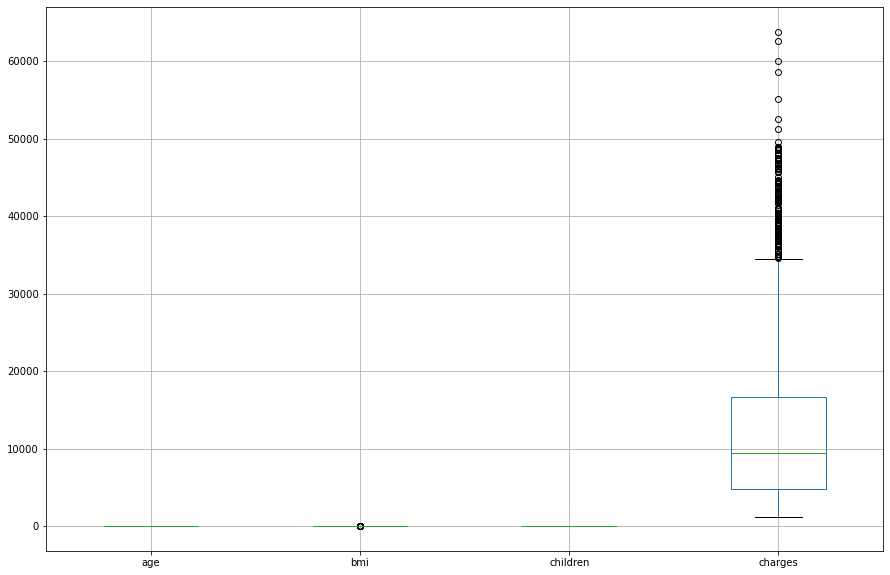

In [20]:
# 5  outliers
plt.figure(figsize=(15,10))
insurance.boxplot()

<AxesSubplot:>

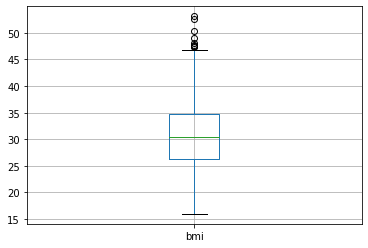

In [21]:
# 5
insurance.boxplot("bmi")

<AxesSubplot:>

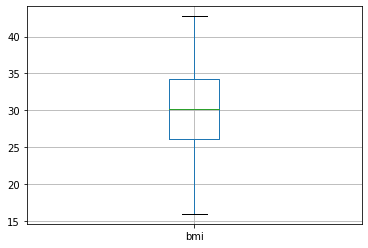

In [22]:
# 6
factor=2
Upper_lim=insurance["bmi"].mean()+insurance["bmi"].std()*factor
No_Outliers=insurance[(insurance["bmi"]<Upper_lim)]
No_Outliers.boxplot("bmi")

<AxesSubplot:>

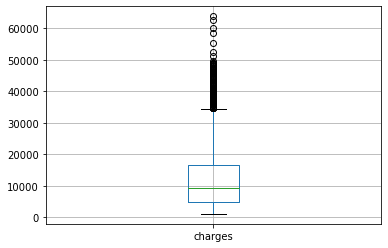

In [23]:
# 5
insurance.boxplot("charges")

<AxesSubplot:>

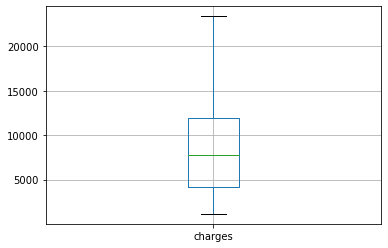

In [24]:
# 6
factor=0.84
Upper_lim=insurance["charges"].mean()+insurance["charges"].std()*factor
No_Outliers=insurance[(insurance["charges"]<Upper_lim)]
No_Outliers.boxplot("charges")

In [25]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
# 7
categorical=insurance.drop(["age","bmi","children","charges"], axis=1)
categorical.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [27]:
for col in ['sex', 'smoker', 'region']:
    insurance[col] = insurance[col].astype('category')
    insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   object  
 5   region    1338 non-null   object  
 6   charges   1338 non-null   float64 
dtypes: category(1), float64(2), int64(2), object(2)
memory usage: 64.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   object  
 6   charges   1338 non-null   f

In [28]:
# # 8 
# # label encoding
# insurance["sex"]=insurance["sex"].astype("category")
# insurance["smoker"]=insurance["smoker"].astype("category")
# insurance["region"]=insurance["region"].astype("category")
# categorical_data=insurance.drop(["age","bmi","children","charges"], axis=1, inplace=True)
insurance["sex_code"]=insurance["sex"].cat.codes
insurance["smoker_code"]=insurance["smoker"].cat.codes
insurance["region_code"]=insurance["region"].cat.codes
insurance.head()

,age,sex,bmi,children,smoker,region,charges,sex_code,smoker_code,region_code
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


<AxesSubplot:>

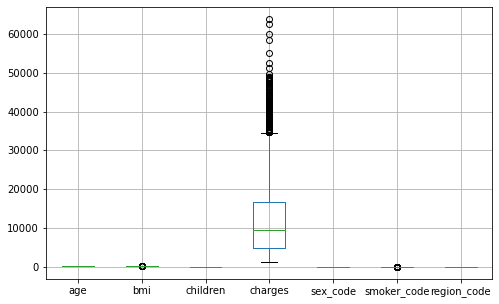

In [29]:
# 8
plt.figure(figsize=(8,5))
insurance.boxplot()

<AxesSubplot:>

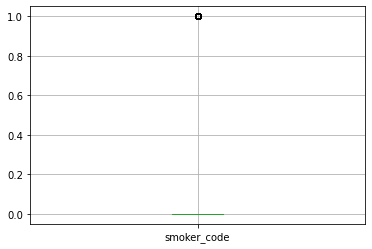

In [30]:
# 8
insurance.boxplot("smoker_code")

<AxesSubplot:>

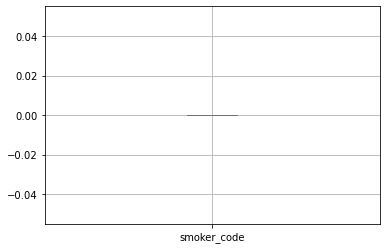

In [31]:
# 8
factor=1.95
Upper_lim=insurance["smoker_code"].mean()+insurance["smoker_code"].std()*factor
No_outliers=insurance[(insurance["smoker_code"]< Upper_lim)]
No_outliers.boxplot("smoker_code")

<AxesSubplot:>

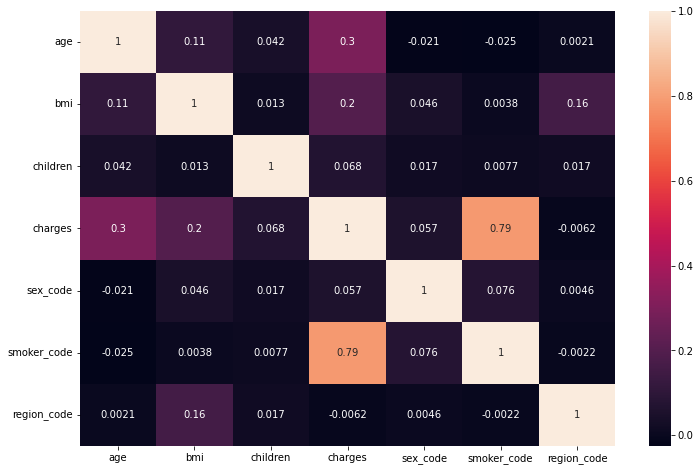

In [32]:
plt.figure(figsize=(12,8))
insurance.corr()
sns.heatmap(insurance.corr(), annot=True)

In [33]:
# 10
insurance.corr()["charges"]
cors=abs(insurance.corr()["charges"])
relevant=cors[cors>0.1]
relevant

age            0.299008
bmi            0.198341
charges        1.000000
smoker_code    0.787251
Name: charges, dtype: float64

In [34]:
insurance.shape

(1338, 10)

In [35]:
# # assignment 8
# # we transform data to get better clarity

from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log, validate=True)
insurance['charges_log'] = transformer.fit_transform(np.array(insurance['charges']).reshape(-1,1))
insurance[['charges', 'charges_log']].head()


,charges,charges_log
0,16884.92400,9.734176
1,1725.55230,7.453302
2,4449.46200,8.400538
3,21984.47061,9.998092
4,3866.85520,8.260197


In [36]:
# 8. 1)# # we transform data to get better clarity
# to achieve data normalicy escpecially when ploting(avoid getting a scewed graph)

In [37]:
# 8 .2)
x=insurance.drop(['charges_log','charges','sex','smoker','region'] ,axis=1)
y=insurance['charges_log']
print(x)
print(y)

      age     bmi  children  sex_code  smoker_code  region_code
0      19  27.900         0         0            1            3
1      18  33.770         1         1            0            2
2      28  33.000         3         1            0            2
3      33  22.705         0         1            0            1
4      32  28.880         0         1            0            1
...   ...     ...       ...       ...          ...          ...
1333   50  30.970         3         1            0            1
1334   18  31.920         0         0            0            0
1335   18  36.850         0         0            0            2
1336   21  25.800         0         0            0            3
1337   61  29.070         0         0            1            1

[1338 rows x 6 columns]
0        9.734176
1        7.453302
2        8.400538
3        9.998092
4        8.260197
          ...    
1333     9.268661
1334     7.698927
1335     7.396233
1336     7.604867
1337    10.279914
Name: cha

In [59]:
# 8 .2)
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(x,y)
model.score(x,y)

0.9708993213456046

In [40]:
# 8. 2)
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]
# print(train_x, train_y)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((80, 6), (1258, 6), (80,), (1258,))

In [41]:
# Q8 .3)
from sklearn.ensemble import RandomForestRegressor
RFC=RandomForestRegressor()
RFC.fit(train_x,train_y)
RFC.score(test_x,test_y)

0.7957593008696745

In [52]:
# Q8  .3)
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(train_x,train_y)
GBR.score(test_x,test_y)

0.8030578165175664

In [46]:
# Q8 .3)
from sklearn import linear_model
Lasso = linear_model.Lasso(alpha=0.1)
Lasso.fit(train_x,train_y)
Lasso.score(test_x,test_y)

0.7141677334988747

In [53]:
# Q8. 3)
from sklearn import linear_model
Rig = linear_model.RidgeCV()
Rig.fit(train_x,train_y)
Rig.score(test_x,test_y)

0.7382388354894596

In [54]:
# Q8  .4)

In [69]:
from sklearn.model_selection import train_test_split
x_1=insurance.drop(['charges_log','charges','sex','smoker','region'] ,axis=1)
y_1=insurance['charges_log']
x_1_train,x_1_test,y_1_train, y_1_test=train_test_split(x_1,y_1, test_size=0.2,random_state=42)
# x_1_train.shape,x_1_test.shape,y_1_train.shape, y_1_test.shape
from sklearn.ensemble import GradientBoostingRegressor
GBR_1=GradientBoostingRegressor()
GBR_1.fit(x_1_train,y_1_train)
GBR_1.score(x_1_test,y_1_test)

0.8657609463550604

In [85]:
# Q8  4)
from sklearn.metrics import r2_score
y_test_mean=np.full(len(y_1_test), y_1_test.mean())
r2score=r2_score(y_1_test, y_test_mean)
r2score

1.1102230246251565e-16

In [83]:
# Q8_4)
from sklearn.metrics import mean_absolute_error
y_preds=GBR_1.predict(x_1_test)
MAE=mean_absolute_error(y_1_test,y_preds)
MAE

0.18438197107512355

In [86]:
# Q8-4)
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_1_test,y_preds)
MSE

0.12069979178272908